<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-Emmanuel-Dominguez-A01793683/blob/main/equipo7_semana05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Maestría en Inteligencia Artificial Aplicada**
## **Curso: Procesamiento de Lenguaje Natural (NLP)**
### Tecnológico de Monterrey
### Dr. Luis Eduardo Falcón Morales


## **Actividad 5.2 Actividad: Continuando con caso de estudio: Amazon-Yelp-Imdb**

Por:

*   Gustavo Rene Ramos Ojeda
*   Nancy Elena Estanislao Lizárraga 
*   Emmanuel Domínguez Bravo A01793683
*   Héctor Raúl Vázquez González

In [ ]:
#Imports
import pandas as pd
import numpy as np
from urllib.request import urlopen
import pathlib

import re
import nltk
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

from collections import Counter



# **1.- Descarga los archivos y cargalos en un DataFrame**

Descarga los 3 archivos de Canvas. En particular, el archivo de datos de IMDb ya no requiere 
transformarse para obtener sus 1000 registros. Al cargar los datos de los tres archivos deberás 
tener un DataFrame de Pandas de 3000 registros, con sus etiquetas. Los archivos los encuentras en 
Canvas y se llaman: amazon5.txt, imdb5.txt, yelp5.txt. 


In [ ]:
from pygments import token
def getTextFromWeb (url):
  with urlopen(url) as file:
    web_file = file.read()
    doc = web_file.splitlines()
    string_list = []
    for line in doc:
       string_list.append(str(line))
    return string_list
  
def getCleanlist(lst):
  newList = []
  for item in lst:
    tokens = item.split("\\t")
    if len(tokens) == 1:
      tokens = [item[:len(item)-1],item[len(item)-2:len(item)-1]]
    tokens[0] = str(tokens[0])[2:]
    tokens[1] = int(str(tokens[1])[0])
    newList.append(tokens)
  return newList

def getDataFrameFromWeb(url):
  new_df = pd.DataFrame (getCleanlist(getTextFromWeb(url)))
  new_df.columns = ["Descripcion", "Valor"]
  return new_df



In [ ]:
amazon_df = getDataFrameFromWeb("https://github.com/RyoTheCat/Public_Documents/raw/main/Servicios%20tecnologicos/amazon5.txt")
yelp_df = getDataFrameFromWeb("https://raw.githubusercontent.com/RyoTheCat/Public_Documents/main/Servicios%20tecnologicos/yelp5.txt")
imdb_df = getDataFrameFromWeb("https://raw.githubusercontent.com/RyoTheCat/Public_Documents/main/Servicios%20tecnologicos/imdb5.txt")


In [ ]:
df =pd.concat([amazon_df,imdb_df,yelp_df],ignore_index=True)
df

df.isnull().values.any()

False





## **2.-Realiza la Limpieza de los Datos con alguna de las técnicas de lematización**

Realiza de nuevo un proceso de limpieza. Aplica el preprocesamiento que consideres adecuado, sin 
embargo, deberás aplicar necesariamente alguna de las técnicas de lematización. Como aplicaremos 
modelos embebidos pre-entrenados, queremos palabras lo más cercanas a las existentes en un 
idioma, inglés en este caso. Aplica y justifica cualquier otro proceso de limpieza que consideres 
adecuado. Recuerda que en esta actividad se usarán vectores embebidos para un problema de 
clasificación, por lo que deberás tomar de acuerdo a este contexto. Justifica todas las 
transformaciones que se apliquen. 

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Guardamos la lista de stopwords que se incluyen de manera predeterminada la suite de librerías de NLTK:
mystopwords = stopwords.words('english')
# Lista de palabras asociada a negaciones en inglés:
negwords = [ 'no', 'nor', 'not', 'ain', 'aren', "aren't", 'don', "don't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
#Metodo para buscar Palabras de Negacion
def searchNegWord (word):
  for item in negwords:
    if (item == word):
      return True
  return False
#Removemos las palabras de negación de la lista de stopwords
New_StopWords = []
for item in mystopwords:
  if not (searchNegWord(item)):
    New_StopWords.append(item)
#Formamos nuestra nueva lista
mystopwords = New_StopWords.copy()
print(len(mystopwords))

139


In [ ]:
def searchStopWord (word):
  for item in mystopwords:
    if (item == word):
      return True
  return False

In [ ]:
def lematizacioDeTokens(BagOfWords):
  ps = PorterStemmer()
  tokens = []
  for word in BagOfWords:
    if (len(word))>1:
      new_word = ps.stem(word)
      if(len(new_word))>1:
        tokens.append(new_word)
      else:
        tokens.append(word)
  return tokens

In [ ]:
def cleaningDataFrame (df):
  clean_df = pd.DataFrame(data=None, columns=df.columns, index=df.index)
  for index in range(len(df)):
    #Extraemos el Comentario
    temp_string = df.iloc[index].at["Descripcion"]
    #Pasamos todo a minusculas
    temp_string = temp_string.lower()
    #Eliminamos signos de puntuacion
    temp_string = re.sub(r'[^\w\s]', ' ', temp_string)
    #Eliminamos numeros
    temp_string = re.sub(r'\d+', '', temp_string)
    #Eliminamos exceso de espacios
    temp_string = re.sub(r' +',' ', temp_string)
    #Se separa por palabras las frases
    temp_words = re.split("\s", temp_string)  
    #Eliminamos Stopwords
    clean_words_list = []
    for word in temp_words:
      if (len(word)>0):
        if not(searchStopWord(word)):
          clean_words_list.append(word)
    #se aplica el proceso de Lematizacion
    clean_words_list = lematizacioDeTokens(clean_words_list)
    #Se crea un nuevo registro
    clean_df.iloc[index].at["Descripcion"] = clean_words_list
    clean_df.iloc[index].at["Valor"] = df.iloc[index].at["Valor"]
  
  return clean_df


In [ ]:
clean_df = cleaningDataFrame(df)
clean_df

Descripcion Valor
0              [no, way, plug, us, unless, go, convert]     0
1                             [good, case, excel, valu]     1
2                                       [great, jawbon]     1
3     [tie, charger, convers, last, minut, major, pr...     0
4                                          [mic, great]     1
...                                                 ...   ...
2995                [think, food, flavor, textur, lack]     0
2996                         [appetit, instantli, gone]     0
2997       [overal, not, impress, would, not, go, back]     0
2998  [whole, experi, underwhelm, think, go, ninja, ...     0
2999  [hadn, wast, enough, life, pour, salt, wound, ...     0

[3000 rows x 2 columns]

In [ ]:
clean_df = clean_df[clean_df['Descripcion'].map(lambda d: len(d)) > 0].copy()  # eliminamos comentarios vacíos del dataaframe

## **3.- Crear Xclean con los comentarios procesados y Y a las etiquetas. También crear los grupos de datos.**

Llamar Xclean a los comentarios procesados y Y a las etiquetas. Realicemos una partición aleatoria 
con los mismos porcentajes de la práctica pasada para poder comparar dichos resultados con los de 
esta actividad, a saber, 70%, 15% y 15%, para entrenamiento, validación y prueba, 
respectivamente. Verifica que obtienes 2100 registros de entrenamiento y 450 para cada uno de 
validación y prueba. 

In [ ]:
#Se crean las variables requeridas
Xclean = clean_df["Descripcion"].copy()
Y = clean_df["Valor"].copy()

print(Xclean.shape)
print(Y.shape)

(2998,)
(2998,)


In [ ]:
x_train, x_val_and_test, y_train, y_val_and_test = train_test_split(Xclean, Y, train_size=.70, shuffle=True, random_state=1) 
x_val, x_test, y_val, y_test = train_test_split(x_val_and_test, y_val_and_test, test_size=.50, shuffle=True, random_state=17)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)


(2098,)
(450,)
(450,)


## **4.- Construye el vocabulario**
 Usando el conjunto de entrenamiento genera un vocabulario que no sea mayor a 1500 palabras, ni 
menor a 1000. ¿Por qué es importante acotar un vocabulario inferior y superiormente? ¿Por qué 
debe usarse solamente el conjunto de entrenamiento para generar el diccionario? Con este 
vocabulario que obtienes, filtra los conjuntos de entrenamiento, validación y prueba, de esta 
manera todos los comentarios usarán solamente palabras válidas de acuerdo a este vocabulario. 
Indica el tamaño del vocabulario obtenido. 


In [ ]:
#Se crea el diccionario
midiccionario = Counter()    

#Se van agregando las palabras al diccionario
for lista in x_train:
  for word in lista:
    if (len(word)>1):
      if word not in midiccionario:
         midiccionario[word] = 0
      midiccionario[word] += 1

#Desplegamos resultados
print('Longitud del diccionario:', len(midiccionario))  
print('\n(word,frequency):') 
print(midiccionario.most_common(10)) 

Longitud del diccionario: 3145

(word,frequency):
[('not', 224), ('good', 159), ('great', 147), ('movi', 146), ('phone', 135), ('film', 129), ('work', 106), ('one', 102), ('time', 101), ('like', 98)]


In [ ]:
#Creamos el nuevo Diccionario
min_freq = 2
midicc = {}

for word, value in midiccionario.items():
  if(value >= min_freq):
    midicc[word] = value

# Mostramos los Resultados
print('Nueva longitud del nuevo vocabulario:', len(midicc))
print(list(midicc.items())[0:5])     # veamos algunos elementos del diccionario.


Nueva longitud del nuevo vocabulario: 1441
[('bill', 3), ('not', 224), ('tip', 5), ('felt', 11), ('server', 13)]


In [ ]:
#Creamos un filtro con las palabras válidas de nuestro vocabulario

list_valid_words = list(midicc)
def flitroDeVocabulario(doc):
  new_doc = []
  for lista in doc:
    new_lista =[]
    for item in lista:
      if item in list_valid_words:
        new_lista.append(item)
    new_doc.append(new_lista)
  return new_doc

In [ ]:
"""Decidimos filtrar directamente a los datos de entrada y volver a hacer la partición
ya que había varios comentarios vacíos y ahora es necesario eliminar sus etiquetas"""

new_X = flitroDeVocabulario(Xclean)

print(len(new_X))

2998


In [ ]:
# Creamos una función para eliminar los comentarios vacíos

def removerX(doc):  
  x = [item for item in doc if list(item)]
  return x

In [ ]:
# Creamos una función para eliminar los valores de Y correspondientes a los comentarios vacíos

def removerY(indexes, y):
  lst=[]
  for index in indexes:
    lst.append(index)  
  x = y.drop(lst)
  return x
  

In [ ]:
# Creamos una lista de índices para los comentarios vacíos después de aplicar el filtro

index_ = [num for num, item in enumerate(new_X) if not list(item)]
index_

[220, 440, 555, 605, 777, 798, 952, 1351, 1419, 2695, 2725]

In [ ]:
# Creamos una  lista de índices de comentarios vacíos en cada subonjunto

index_1 = [num for num, item in enumerate(new_x_train) if not list(item)]
index_2 = [num for num, item in enumerate(new_x_test) if not list(item)]
index_3 = [num for num, item in enumerate(new_x_val) if not list(item)]
index_list = index_1 + index_2 + index_3

In [ ]:
# Eliminamos comentarios vacíos

x_clean = removerX(new_X)
len(x_clean)

2987

In [ ]:
# Eliminamos las etiquetas de comentarios

newY = removerY(index_, Y)
len(newY)

2987

In [ ]:
# Ahora hacemos la separación de los datos sin comentarios vacíos 

new_x_train, new_x_val_and_test, new_y_train, new_y_val_and_test = train_test_split(x_clean, newY, train_size=.70, shuffle=True, random_state=1) 
new_x_val, new_x_test, new_y_val, new_y_test = train_test_split(new_x_val_and_test, new_y_val_and_test, test_size=.50, shuffle=True, random_state=17)

print(len(new_x_train))
print(len(new_x_val))
print(len(new_x_test))
print(len(new_y_train))
print(len(new_y_val))
print(len(new_y_test))

2090
448
449
2090
448
449


## **5.- Tabla comparativa de modelos de vectores embebidos**
Utilizarás los vectores embebidos FastText preentrenados por Facebook.
a. Incluye una tabla comparativa de pros y contras entre los modelos FastText, word2vec de
Google y Glove de Stanford. 
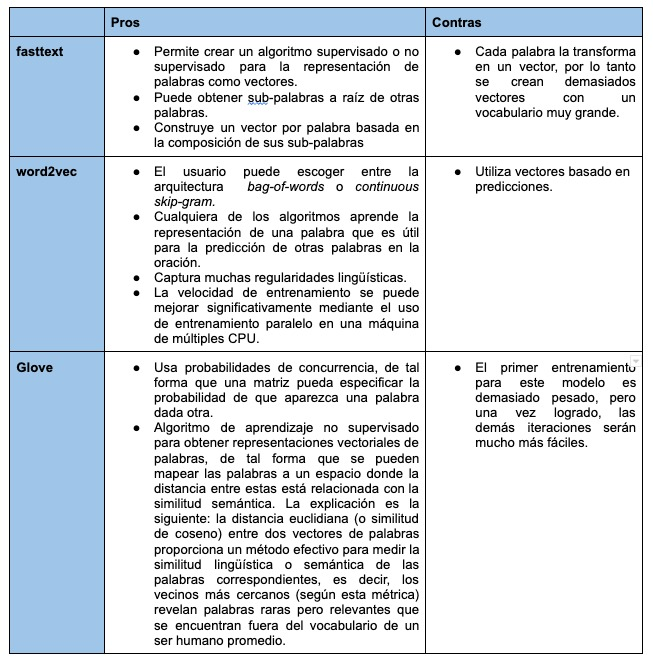

## **6.- Modelo FastText**
Utiliza el modelo FastText de vectores embebidos pre-entrenados de dimensión 300 para generar
un nuevo diccionario clave-valor, donde la “clave” será cada token o palabra de tu vocabulario y el
“valor” será su vector embebido de dimensión 300. Este diccionario deberá ser del mismo tamaño
que el vocabulario previo que hayas construido previamente.

In [ ]:
!pip install fasttext

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import fasttext
import fasttext.util

In [ ]:
fasttext.util.download_model('en', if_exists='ignore')  # English

'cc.en.300.bin'

In [ ]:
ft = fasttext.load_model('cc.en.300.bin')

In [ ]:
len(ft.words)

2000000

In [ ]:
ft.get_dimension()

300

In [ ]:
import numpy as np
vocab = list(midicc.keys())
vocab_emb = np.zeros((len(vocab), ft.get_dimension()))
vocab_emb.shape

(1441, 300)

In [ ]:
for k, w in enumerate(vocab):
  vocab_emb[k,:] = ft.get_word_vector(w)

vocab_emb 


array([[-0.20707309,  0.11555441,  0.01502888, ...,  0.06776077,
         0.17261907, -0.06621176],
       [-0.06350044,  0.01561109, -0.01362565, ...,  0.19379897,
        -0.0011682 , -0.00841248],
       [-0.13871635,  0.05923158, -0.01597072, ...,  0.15853523,
        -0.00374637, -0.08593243],
       ...,
       [ 0.00624164,  0.01840319, -0.01277432, ...,  0.08335105,
        -0.05041173, -0.03867637],
       [ 0.0113904 , -0.04300222,  0.04653873, ..., -0.03938303,
         0.00960538, -0.0515928 ],
       [ 0.02682421,  0.05594137,  0.04150252, ...,  0.03622698,
         0.05628066,  0.01499233]])

In [ ]:
for x in vocab_emb:
  if np.size(x)==0:
    print(x)

In [ ]:
new_dicc = {}

for k,w in enumerate(vocab):
  tmp = ft.get_word_vector(w)
  new_dicc.update({w:tmp})

new_dicc

{'bill': array([-0.20707309,  0.11555441,  0.01502888,  0.10118499, -0.13089588,
        -0.00626766,  0.02185122, -0.11203001, -0.07168099, -0.07613519,
        -0.0112022 , -0.05773708,  0.04608309,  0.04486326, -0.0126211 ,
         0.08602822, -0.08031313,  0.12339942,  0.00161982, -0.02618006,
        -0.14640355, -0.09682497, -0.09772612,  0.01080493,  0.00114335,
         0.10623527, -0.04943448,  0.18530004,  0.03383186,  0.13803123,
        -0.06272555, -0.08226047, -0.09867199, -0.18227357,  0.03860419,
         0.15201786, -0.05647365, -0.01286654,  0.03118853,  0.04680151,
         0.03776857,  0.12233298, -0.01553668,  0.05641341, -0.03925362,
         0.08500709,  0.03220507, -0.03955784,  0.03013393, -0.01001969,
         0.23002371,  0.03071248, -0.07814227,  0.01484524,  0.20017546,
         0.08640338, -0.03374404,  0.03581137, -0.11893227, -0.12800252,
        -0.1621004 ,  0.01486971, -0.01892926, -0.02226817,  0.00127619,
         0.18789974, -0.0546327 ,  0.030516

In [ ]:
""" Guardamos el diccionario de vectores embebidos en un archivo Pickle para su
posterior uso y así liberar recursos de cómputo """

#import pickle

#pickle_out = open("dict.pickle","wb")
#pickle.dump(new_dicc, pickle_out)
#pickle_out.close()

' Guardamos el diccionario de vectores embebidos en un archivo Pickle para su\nposterior uso y así liberar recursos de cómputo '

In [ ]:
import os
os.listdir('.')

['.config', 'dict.pickle', 'sample_data']

In [ ]:
del ft # Borramos el conjunto de vectores embebidos del modelo FastText

## **7.- Arreglos de vectores embebidos por comentario**
Una manera de utilizar los vectores embebidos con modelos de aprendizaje automático en
documentos de texto, es asignar a cada comentario filtrado el vector embebido de dimensión 300
que resulta de promediar todos sus tokens. Así, en este ejercicio deberás generar los arreglos
correspondientes para los conjuntos de entrenamiento, validación y prueba. Los llamaremos
trainEmb, valEmb y testEmb, respectivamente. ¿Cuáles son sus dimensiones? ¿Se podrían usar para
su representación matrices dispersas (sparse matrices) como en el caso de la matriz Tf-idf?
Responde a dichas preguntas.

In [ ]:
with open("dict.pickle","rb") as w:
  dicc_pickle = pickle.load(w)    

In [ ]:
trainEmb = []
valEmb = []
testEmb = []

data = [new_x_train, new_x_val, new_x_test]

for subset in data:  
  for doc in subset:
    result = [(dicc_pickle[token]) for token in doc if token in dicc_pickle] #aseguramos que no incluímos comentarios que no estén en el diccionario 
    if subset == new_x_train:
      trainEmb.append(np.mean(result,axis=0).reshape(-1))
    if subset == new_x_val:
      valEmb.append(np.mean(result,axis=0))
    if subset == new_x_test:
      testEmb.append(np.mean(result,axis=0))

#trainEmb = np.array(trainEmb, dtype=object).reshape(-1)
#valEmb = np.array(valEmb, dtype=object).reshape(-1)
#testEmb = np.array(testEmb, dtype=object).reshape(-1)

# Obtenemos una lista de arreglos numpy con un vector de dimensión 300 por cada comentario  
print(len(trainEmb),len(new_y_train))
print(len(valEmb),len(new_y_val))
print(len(testEmb),len(new_y_test))


2090 2090
448 448
449 449


In [ ]:

#Solución alterna para verificar resultados
def arreglos(diccionario, data):
  vectores_emb = []
  for comentario in data:  
    result = np.mean([(dicc_pickle[token]) for token in comentario if comentario != []], axis=0)
    vectores_emb.append(result)
  return vectores_emb

trainEmb = arreglos(dicc_pickle,new_x_train)
valEmb = arreglos(dicc_pickle,new_x_val)
testEmb = arreglos(dicc_pickle,new_x_test)


print(len(trainEmb))
print(len(valEmb))
print(len(testEmb))


2090
448
449


En este ejercicio obtuvimos una lista de arreglos, uno para cada comentario no vacío de cada conjunto. Las dimensiones de los arreglos unidimensionales que resultaron de promediar los diferentes vectores de cada comentario fue de (300,1). Para poder reducir los recursos de cómputo debido al tamaño considerable de los vectores embebidos que resultan de utilizar FastText, consideramos que se podrían utilizar a modo de matriz de dispersión, donde el analista podría tomar un promedio de todas las características y asignarle un valor a cada palabra, o realizando alguna otra operación similar (media, asignar pesos ponderados, etc.) 

##8. Modelos de aprendizaje automático
Utiliza los modelos de regresión lineal y bosque aleatorio (random forest) y encuentra sus desempeños (accuracy). Compara los resultados con los de la semana anterior. 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler #fixed import

scaler = MinMaxScaler(feature_range=(1, 2))
trainEmbScaler = scaler.fit_transform(trainEmb)

new_y_train=new_y_train.astype('int')
new_y_val = new_y_val.astype('int')

modeloLRcount = LogisticRegression(max_iter=200, C=1)
modeloLRcount.fit(trainEmb, new_y_train)

modeloRFcount = RandomForestClassifier(criterion='entropy', max_depth=10)
modeloRFcount.fit(trainEmb, new_y_train)

modeloNBcount = MultinomialNB(alpha=1)
modeloNBcount.fit(trainEmbScaler, new_y_train)

print('LR: Train-accuracy: %.2f%%' % (100*modeloLRcount.score(trainEmb, new_y_train)))
print('LR: Val-accuracy: %2.f%%' % (100*modeloLRcount.score(valEmb, new_y_val)))

print('\nRF: Train-accuracy: %.2f%%' % (100*modeloRFcount.score(trainEmb, new_y_train)))
print('RF: Val-accuracy: %.2f%%' % (100*modeloRFcount.score(valEmb, new_y_val)))

print('\nNB: Train-accuracy: %.2f%%' % (100*modeloNBcount.score(trainEmbScaler, new_y_train)))
print('NB: Val-accuracy: %.2f%%' % (100*modeloNBcount.score(valEmb, new_y_val)))


LR: Train-accuracy: 82.78%
LR: Val-accuracy: 82%

RF: Train-accuracy: 99.81%
RF: Val-accuracy: 79.02%

NB: Train-accuracy: 74.11%
NB: Val-accuracy: 64.51%


Comparando los mejores resultados del ejercicio de la semana pasada con los mejores resultados de esta semana, podemos observar una mejora de un 4% aproximadamente. Donde el modelo de Regresión logística de esta semana tuvo un mejor desempeño que el modelo Multinomial de las matrices de conteo de la semana pasada.

# **9. Obtener la matriz de confusión e interpretar sus valores.**

In [ ]:
#Se toma el modelo con los mejores resultados

mejor_modelo_Count = modeloLRcount # incluye el nombre, modeloXXcount, de tu mejor modelo.

new_y_test = new_y_test.astype('int')


print('Test-accuracy con el mejor modelo %.2f%%' % (100*mejor_modelo_Count.score(testEmb, new_y_test)))

from sklearn.metrics import confusion_matrix

pred = mejor_modelo_Count.predict(testEmb)
print('\nMatriz de confusión con el mejor modelo:')
print(confusion_matrix(new_y_test, pred, labels=[0,1]))

Test-accuracy con el mejor modelo 84.19%

Matriz de confusión con el mejor modelo:
[[180  41]
 [ 30 198]]


En este caso, el mejor modelo (Regresión Lineal) muestra 30 falsos negativos, los cuales bajaron en un 50% respecto a la matriz de Tf-idf con el modelo Nayve-Bayes. Para los falsos positivos, también tuvimos un mejora en los errores, 41 contra 52. Podemos ver que con los vectores embebidos de FastText y el modelo de aprendizaje automático tenemos una mejora en que las recomendaciones que hagamos serán en general más confiables, ya que la cantidad de características con las que contamos es significativamente mayor que únicamente realizar una matriz de conteo por la frecuencia de uso de las palabras.   

# **10. Comenta con tus compañeros de equipo los pasos realizados en esta actividad e incluyan sus conclusiones finales.**

A pesar de que el algoritmo de fasttext requiere de mucha preparación en los datos de entrada, podemos concluir que nos brinda una base sólida para el analisis de comentarios. Ya que este algoritmo cuenta con la característica de que no se nos presentará el error de OOV (Out Of Vocabulary), a comparación de su contraparte de word2vec. 

Uno de las situaciones con los que tuvimos que lidiar en el proceso de preparación de los datos fue el solucionar los comentarios vacíos, ya que sus etiquetas sí estaban dadas y para poder ingresar los datos a los modelos de aprendizaje automático, se necesita tener el mismo tamaño de los arreglos unidimensionales tanto de las variables dependientes como de la independiente, lo cual identificamos una vez ya hecha la partición de los datos, por lo que decidimos realizar la limpieza partiendo del conjunto de datos X, Y original. 



